In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Step 3: Load Dataset
df = pd.read_csv('/content/melb_data.csv')

# # Step 4: Basic Info
# print("Shape of data:", df.shape)
# print("\nColumn types:\n", df.dtypes)
# print("\nMissing values:\n", df.isnull().sum())
# print("\nStatistical Summary:\n", df.describe(include='all'))
# print("\nDuplicate rows:", df.duplicated().sum())

# # Step 5: Visualizations
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
# plt.title("Correlation Heatmap")
# # plt.show()

# # 🧼 Step 6: Missing Value Analysis
# missing_values = df.isnull().sum()
# missing_percent = (missing_values / len(df)) * 100
# missing_df = pd.DataFrame({
#     'Missing Values': missing_values,
#     'Percent (%)': missing_percent
# })
# print("\n❗ Missing values per column:\n", missing_df)

# plt.figure(figsize=(12,6))
# sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
# plt.title("Missing Value Heatmap")
# plt.show()

# Step 7: Drop high-cardinality and irrelevant columns
df = df.drop(['Address', 'SellerG', "Method", 'Date', 'Postcode'], axis=1)

# # Step 8: Drop rows where target is missing
df.dropna(subset=['Price'], inplace=True)

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


# Step 9: One-hot encode categorical variables
df_encoded = pd.get_dummies(df)

# Step 10: Define features and target
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Step 11: Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Optional: print shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Step 12: Train Random Forest Model
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

# Step 13: Predict and Evaluate
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", predictions)


print(f"\n✅ Mean Absolute Error: {mae:.2f}")

X_train shape: (10864, 369)
X_test shape: (2716, 369)
y_train shape: (10864,)
y_test shape: (2716,)
Mean Absolute Error: [1671080.  878980.  595635. ... 1298665. 1241490. 1103970.]

✅ Mean Absolute Error: 161127.68


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(predictions)

[1671080.  878980.  595635. ... 1298665. 1241490. 1103970.]


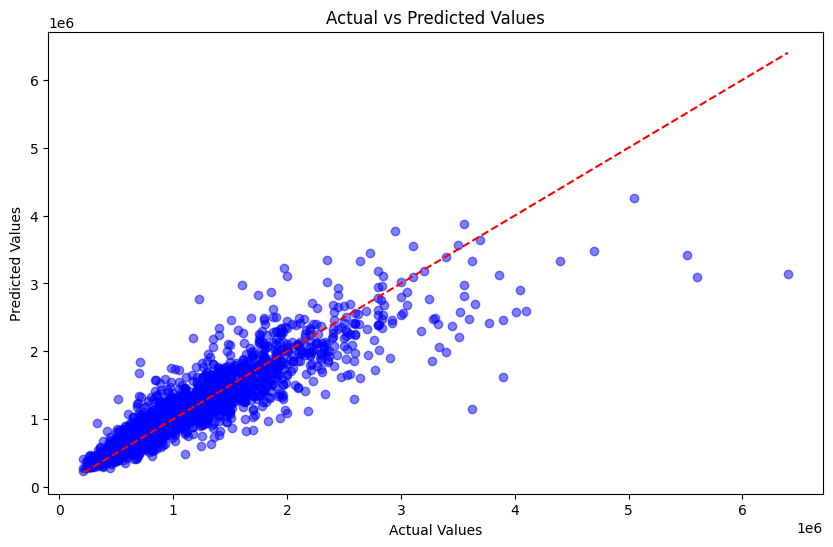

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)


r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 161127.68
Mean Squared Error (MSE): 71636930348.15
Root Mean Squared Error (RMSE): 267650.76
R-squared (R²): 0.82


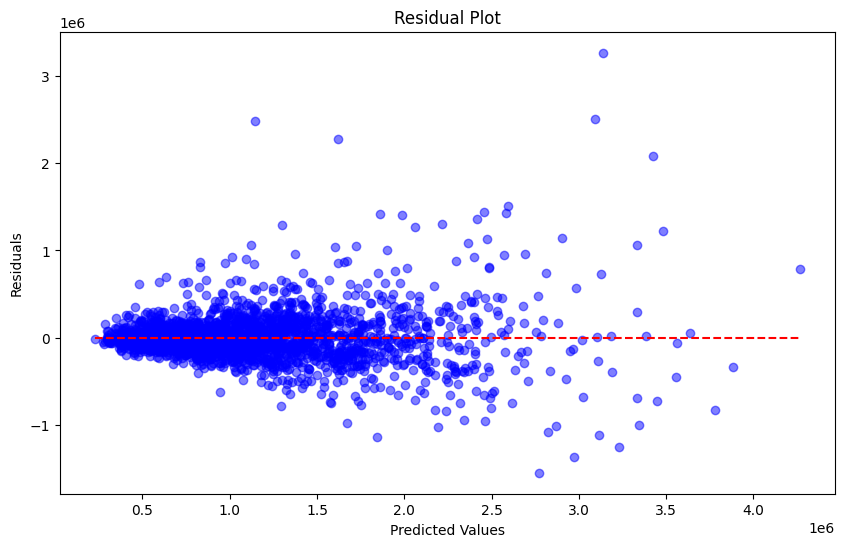

In [ ]:
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5, color='blue')
plt.hlines(y=0, xmin=min(predictions), xmax=max(predictions), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

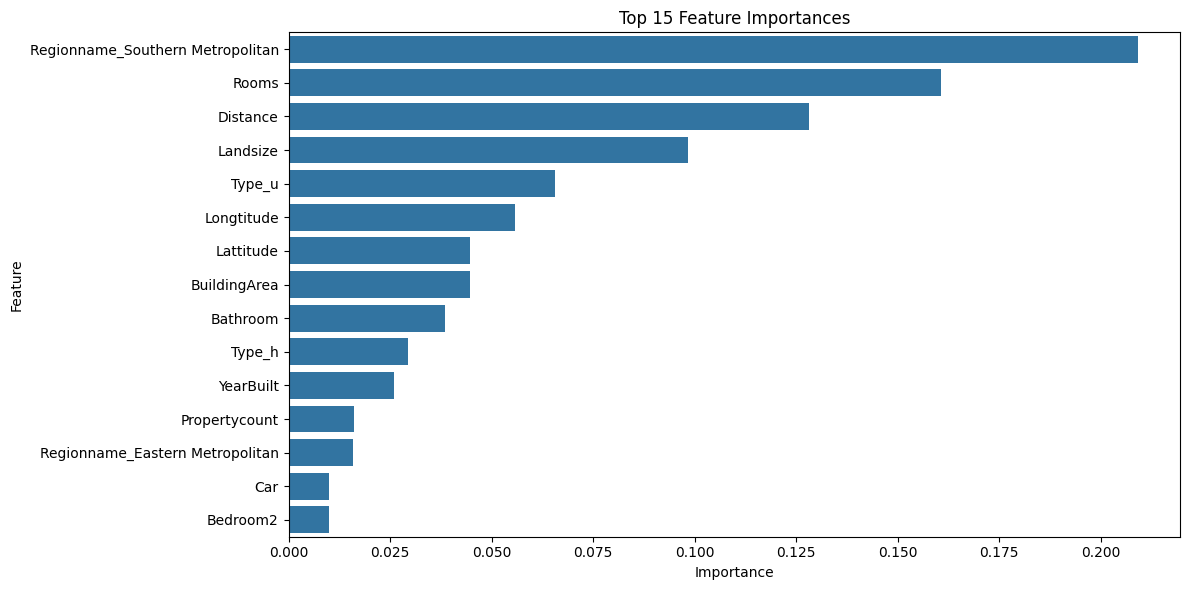

In [ ]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

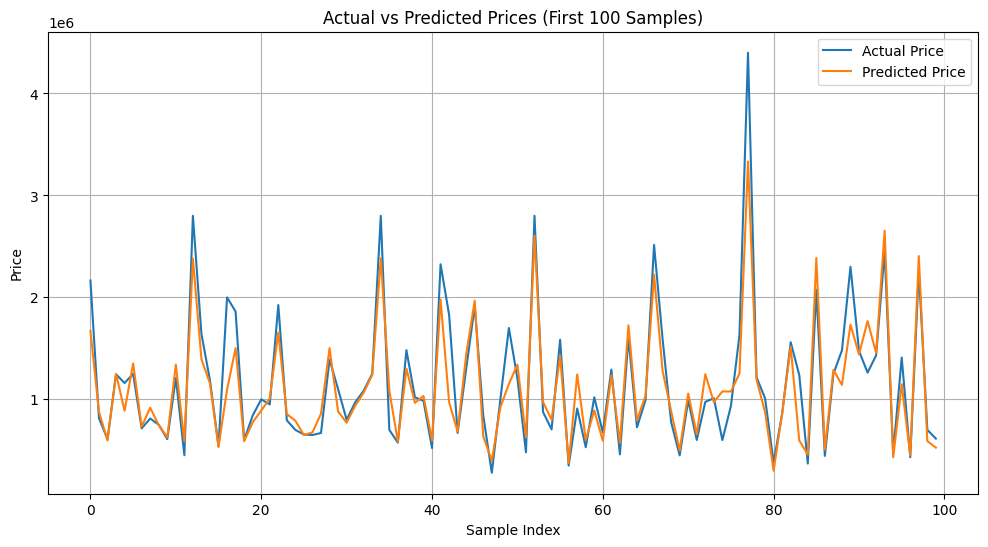

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label='Actual Price')
plt.plot(predictions[:100], label='Predicted Price')
plt.title("Actual vs Predicted Prices (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

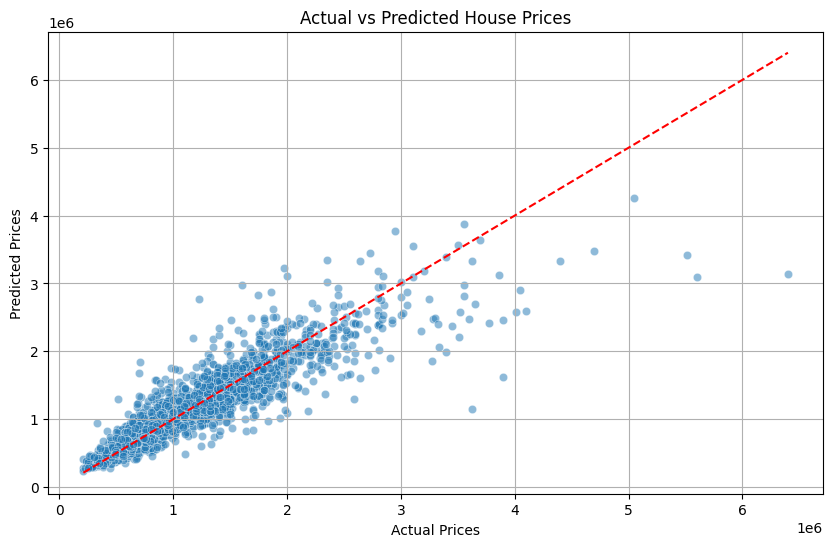

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # y=x line
plt.grid(True)
plt.show()

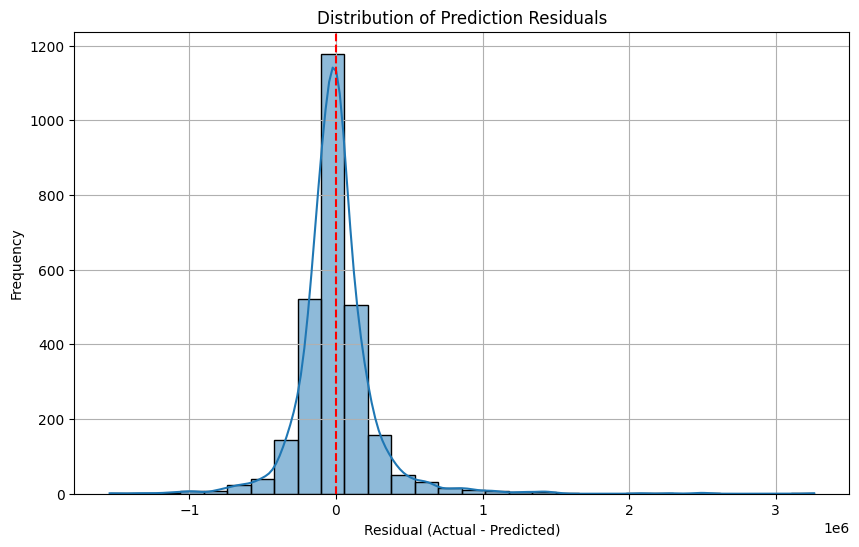

In [ ]:
residuals = y_test - predictions

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Prediction Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, max_error, explained_variance_score

mape = mean_absolute_percentage_error(y_test, predictions)
medae = median_absolute_error(y_test, predictions)
maxerr = max_error(y_test, predictions)
explained_var = explained_variance_score(y_test, predictions)

print(f"📈 Additional Regression Metrics:")
print(f"🔹 MAPE: {mape * 100:.2f}%")
print(f"🔹 Median Absolute Error: {medae:.2f}")
print(f"🔹 Max Error: {maxerr:.2f}")
print(f"🔹 Explained Variance Score: {explained_var:.4f}")

📈 Additional Regression Metrics:
🔹 MAPE: 14.86%
🔹 Median Absolute Error: 100265.00
🔹 Max Error: 3262750.00
🔹 Explained Variance Score: 0.8187


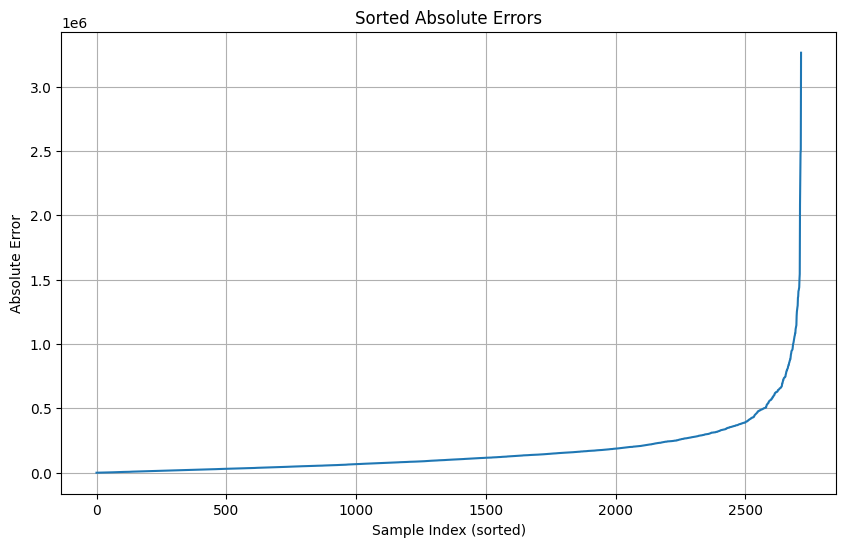

In [ ]:
abs_errors = np.abs(y_test - predictions)
sorted_errors = np.sort(abs_errors)

plt.figure(figsize=(10,6))
plt.plot(sorted_errors)
plt.title("Sorted Absolute Errors")
plt.xlabel("Sample Index (sorted)")
plt.ylabel("Absolute Error")
plt.grid(True)
plt.show()

In [ ]:
print("\n📄 Result Summary:")
print(f"The Random Forest model achieved an R² score of {r2:.4f}, indicating that approximately {r2 * 100:.1f}% of the variance in house prices is explained by the model.")
print(f"The Mean Absolute Error (MAE) is {mae:.2f}, suggesting that predictions are, on average, off by about ${mae:,.0f}.")
print(f"The Root Mean Squared Error (RMSE) is {rmse:.2f}, reflecting the typical size of prediction errors.")
print(f"The Mean Absolute Percentage Error (MAPE) is {mape * 100:.2f}%, meaning predictions are off by this percentage on average.")
print(f"The maximum observed prediction error is {maxerr:.2f}, which helps identify the worst-case deviation.")
print("Overall, the model shows good predictive performance, with relatively low error values and a strong fit to the data.")


📄 Result Summary:
The Random Forest model achieved an R² score of 0.8187, indicating that approximately 81.9% of the variance in house prices is explained by the model.
The Mean Absolute Error (MAE) is 161127.68, suggesting that predictions are, on average, off by about $161,128.
The Root Mean Squared Error (RMSE) is 267650.76, reflecting the typical size of prediction errors.
The Mean Absolute Percentage Error (MAPE) is 14.86%, meaning predictions are off by this percentage on average.
The maximum observed prediction error is 3262750.00, which helps identify the worst-case deviation.
Overall, the model shows good predictive performance, with relatively low error values and a strong fit to the data.
